  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 9212
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([300.        , 300.00110891, 300.01219797, ..., 599.49623997,
       599.75525673, 600.        ])
 t_events: None
        y: array([[ 0.00000000e+00,  2.33637664e-07,  2.82646333e-05, ...,
         7.18203003e-02,  7.33268453e-02,  5.58038822e-02],
       [ 1.00000000e-01,  9.99999385e-02,  9.99925607e-02, ...,
         6.29774431e-03,  1.55463912e-02,  2.73168541e-02],
       [ 1.00000000e-01,  9.99992622e-02,  9.99107522e-02, ...,
        -7.64146064e-02, -1.11898074e-02,  9.20191917e-02],
       [ 0.00000000e+00,  4.21383148e-04,  4.63340335e-03, ...,
         5.94145861e-02, -4.17665106e-02, -8.73833315e-02],
       [ 0.00000000e+00, -1.10890618e-04, -1.21973678e-03, ...,
         2.86148495e-02,  4.27916709e-02,  5.22394650e-02],
       [ 0.00000000e+00, -1.33068141e-03, -1.46288595e-02, ...,
     

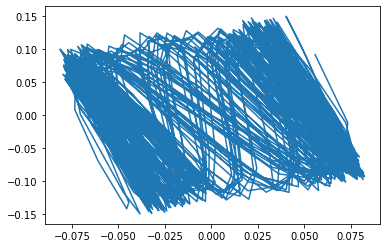

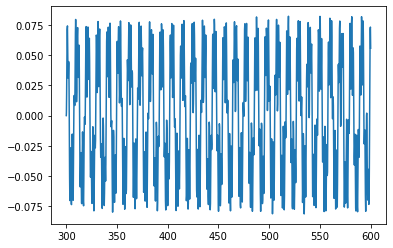

In [1]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import random

def X2(o, e):
    x2 = 0
    for i in range(len(o)):
        x2 += (o[i] - e[i]) ** 2 / e[i]
    return x2

def Max_Seq_1(S):
    k = 0
    Maxk = 0
    for i in range(len(S)):
        if S[i] == '1':
            k += 1
        else:
            if Maxk < k:
                Maxk = k
            k = 0
    if Maxk < k:
        Maxk = k        
    return Maxk

M = [5, 7, 1]
k2 = [100, 70, 120]

def ab_sys(t, Y):
    X = [Y[0] * abs(Y[0]), Y[1] * abs(Y[1]), Y[2] * abs(Y[2])]
    return [Y[3],
           Y[4],
           Y[5],
           -k2[0] / M[0] * X[0] + k2[1] / M[0] * (X[1] - X[0]) + k2[2] / M[0] * (X[2] - X[0]), 
            -k2[1] / M[1] * (X[1] - X[0]),
            -k2[2] / M[2] * (X[2] - X[0])]

sol = solve_ivp(ab_sys, [300, 600], [0, 0.1, 0.1, 0, 0, 0])
print(sol)

plt.plot(sol.y[0], sol.y[2])
plt.show()

plt.plot(sol.t, sol.y[0])
plt.show()

Arr = []
i = 1
n = 202
while i <= n:
    OY = random.choice(sol.y[2])
    if abs(OY) > 0.02:
        Arr.append(abs(OY))
        i += 1

Min = min(Arr)
PRN = []
k = 0
for i in range(n):
    PRN.append(Arr[i] - Min)

Max = max(PRN)

for i in range(n):
    PRN[i] /= Max
    if PRN[i] < 0.5: k += 1
        
PRN.remove(1)
PRN.remove(0)

n = len(PRN)

Bit = []
for i in range(n):
    b = bin(int(PRN[i] * 2 ** 32 - 1))[2:]
    while len(b) != 32:
        b = '0' + b
    Bit.append(b)

In [2]:
import math

Sum = 0
for i in range(len(Bit)):
    for j in range(len(Bit[i])):
        if Bit[i][j] == '1':
            Sum += 1
        else:
            Sum -= 1

n = len(Bit) * len(Bit[0])
Sum = abs(Sum) / math.sqrt(len(Bit) * len(Bit[0]))
p_value = 1 - math.erf(Sum / math.sqrt(2))
p_value

0.745181071693432

In [3]:
import scipy

S = ''
Arr = []
S = ''.join(Bit)
m = 100
for i in range(0, len(S), m):
    Arr.append(S[i:i + m])
if len(S) % m != 0:
    Arr = Arr[:-1]
cnt = []
for i in Arr:
    cnt.append(i.count('1')) 
x2 =  2 * X2(cnt, [m / 2] * len(cnt))
p_value = 1 - scipy.special.gammainc(len(cnt) / 2, x2 / 2)
p_value

0.5461425876468518

In [4]:
n = len(S)
p = S.count('1') / n
if abs(p - 1 / 2) >= 2 / math.sqrt(n):
    print("Fall")
else:
    V = 1
    for i in range(n - 1):
        if S[i] != S[i + 1]:
            V += 1
    p_value = 1 - math.erf(abs(V - 2 * n * p * (1 - p)) / (2 * math.sqrt(2 * n) * p * (1 - p)))
    print(p_value)

0.5643922677358144


In [5]:
Seq1 = []
for i in range(int(n // 128)):
    Str = S[128 * i:128 * i + 128]
    Seq1.append(Max_Seq_1(Str))
V = []
k = 0
V = []
k = 0
for i in range(5):
    k += Seq1.count(i)
V.append(k)
for i in range(5, 9):
    V.append(Seq1.count(i))
V.append(int(n // 128 - sum(V)))
x2 = X2(V, [49 * 0.1174, 49 * 0.2430, 49 * 0.2493, 49 * 0.1752, 49 * 0.1027, 49 * 0.1124])
p_value = 1 - scipy.special.gammainc(5 / 2, x2 / 2)
p_value

0.18403928582936113

In [ ]:
"""import numpy as np

M = 12
Q = 12

def P(R):
    prod = 1
    for i in range(R):
        prod *= (1 - 2 ** (i - Q)) * (1 - 2 ** (i - M)) / (1 - 2 ** (i - R))
    return 2**(R * (Q + M - R) - M * Q) * prod

Arr = []
A = [[0] * Q for i in range(M)]
i = j = 0
for k in range(len(S) - len(S) % (M * Q)):
    A[i][j] = int(S[k])
    if j != Q - 1:
        j += 1
    else:
        j = 0
        i += 1
    if i == M:
        Arr.append(np.array(A))
        i = 0
print(S)
print(Arr)
Rank = []
for i in Arr:
    Rank.append(np.linalg.matrix_rank(i))
F = []
for i in range(1, min(M, Q) + 1):
    F.append(Rank.count(i))
x2 = X2(F, [len(S) // (M * Q) * P(i) for i in range(1, min(M, Q) + 1)])
p_value = 1 - scipy.special.gammainc(1, x2 / 2)
p_value"""

In [ ]:
0.9402147118942105
0.09600960005964654
0.9005791283311039
0.29216656770647287
0.5572425019978584

0.670836674740339
0.16049034543934926
0.10908861515544954
0.9560294303219861
0.474111266414281

0.5652912969944014
0.946231432185135
0.6497163521442271
0.9477248270932722
0.7772409771042589

0.7833162383072103
0.6752811693236491
0.8618208673261198
0.7803409073868531
0.775189795585958

0.23013934044341666
0.15665292573825418
0.002336998337500784
0.005153671120415537
0.09857073390989679